<a href="https://colab.research.google.com/github/hmezer/dai-project/blob/main/explanatory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hmezer/dai-project

Cloning into 'dai-project'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 143 (delta 65), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 21.60 MiB | 19.73 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
# extract the zip content at dai-project/data/nasdaq-sentiment.zip
!unzip -o dai-project/data/nasdaq-sentiment.zip -d dai-project/data/nasdaq-sentiment/

Archive:  dai-project/data/nasdaq-sentiment.zip
 extracting: dai-project/data/nasdaq-sentiment/chunk_3_batch_23.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_3_batch_26.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_4_batch_16.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_2_batch_91.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_2_batch_173.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_2_batch_20.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_1_batch_43.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_4_batch_109.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_3_batch_41.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_1_batch_30.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_3_batch_35.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_1_batch_67.jsonl  
 extracting: dai-project/data/nasdaq-sentiment/chunk_3_batch_116.jsonl  
 extracting: 

In [12]:
# import the *.jsonl objects from the directory
import glob
import json
import pandas as pd

dir = "dai-project/data/nasdaq-sentiment/"
files = glob.glob(dir + "*.jsonl")
dfs = []
for file in files:
    df = pd.read_json(file, lines=True)
    dfs.append(df)
df = pd.concat(dfs)
print(df.shape)
df.head()

(94388, 5)


,ticker,date,polarity_diluted,polarity_pure,polarity_immediate
0,INTC,2023-09-18,0.653534,0.980300,1
1,CRWD,2023-09-18,0.625569,0.970711,2
2,CEG,2023-09-18,0.397454,0.960515,0
3,AMZN,2023-09-18,0.157951,0.947704,0
4,CMCSA,2023-09-18,0.199813,0.999065,0


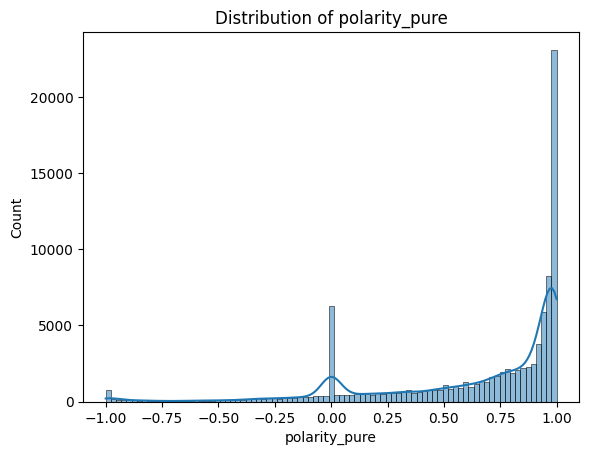

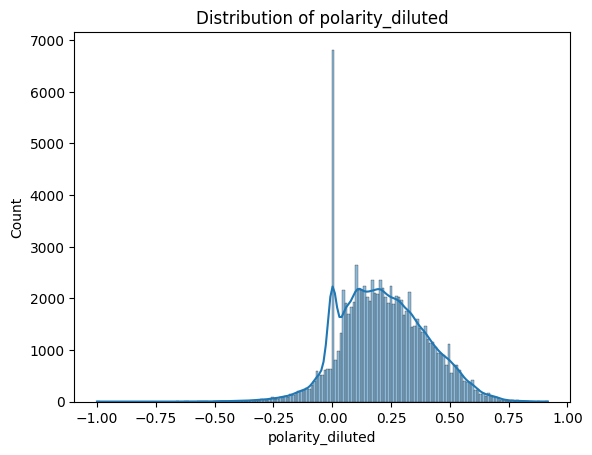

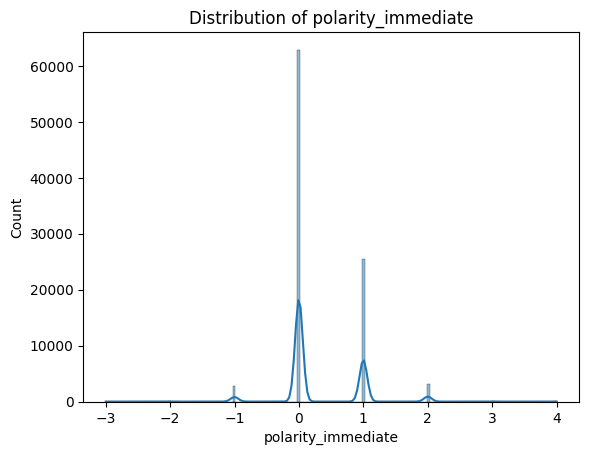

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['polarity_pure', 'polarity_diluted', 'polarity_immediate']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

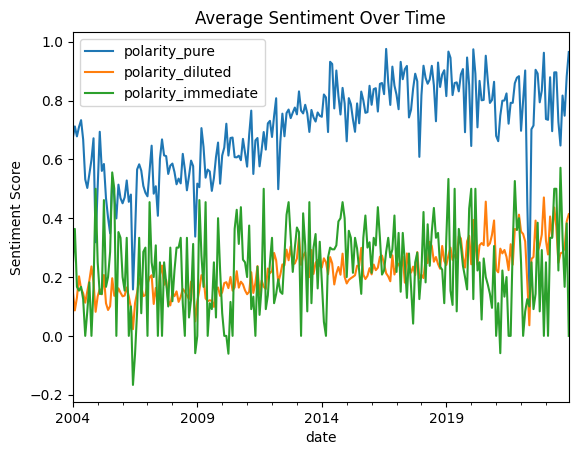

In [15]:
# Aggregated mean sentiment per month
df_monthly = (df[df["ticker"] == "AMZN"]
              .set_index('date')
              .resample('ME')
              .mean(numeric_only=True))
df_monthly[['polarity_pure', 'polarity_diluted', 'polarity_immediate']].plot()
plt.title('Average Sentiment Over Time')
plt.ylabel('Sentiment Score')
plt.show()

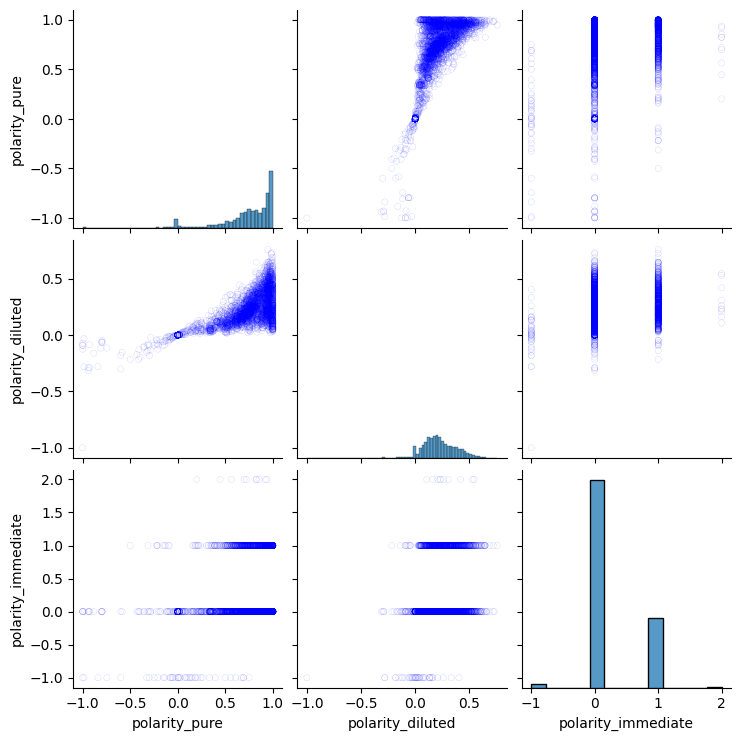

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[df["ticker"] == "AMZN"][['polarity_pure', 'polarity_diluted', 'polarity_immediate']],
    kind='scatter',
    diag_kind='hist',
    plot_kws={
        'marker': 'o',           # circle marker
        'facecolors': 'none',    # hollow inside
        'edgecolors': 'b',       # blue edge
        's': 20,                 # size
        'linewidths': 0.1,       # thin edge
        'alpha': 0.5             # semi-transparent
    }
)
plt.show()

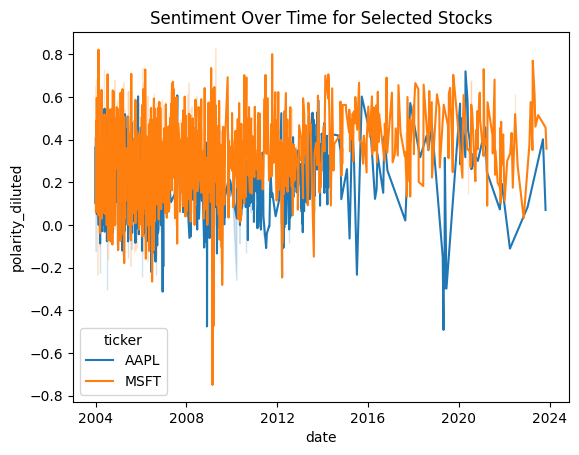

In [43]:
tickers = ['AAPL', 'MSFT']
df_subset = df[df['ticker'].isin(tickers)]
sns.lineplot(x='date', y='polarity_diluted', hue='ticker', data=df_subset)
plt.title('Sentiment Over Time for Selected Stocks')
plt.show()